# Анализ востребованности у работодателей языков программирования в вакансиях на позицию Junior IT-специалиста

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("dataset.csv")

In [40]:
df.head()

,ID,VACANCY_TITLE,COMPANY_NAME,SALARY,CITY,DATE,PROGRAMMING_LANGUAGE,VACANCY_URL
0,94450348,Junior Frontend разработчик,EasyDev,60000.0,Москва,2024-03-09,Python,https://hh.ru/vacancy/94450348
1,94354526,Стажер-разработчик Python,Додо Пицца,150000.0,Ростов-на-Дону,2024-03-06,Python,https://hh.ru/vacancy/94354526
2,94120837,Python junior разработчик,Скиллтеллект,50000.0,Санкт-Петербург,2024-03-01,Python,https://hh.ru/vacancy/94120837
3,94228875,Junior Frontend разработчик,MacBuildServer,50000.0,Самара,2024-03-07,Python,https://hh.ru/vacancy/94228875
4,94293788,Junior Python-разработчик,СОГАЗ,NaN,Москва,2024-03-06,Python,https://hh.ru/vacancy/94293788


# Подготовка данных

### Заполняем пропуски

array([[<Axes: title={'center': 'SALARY'}>]], dtype=object)

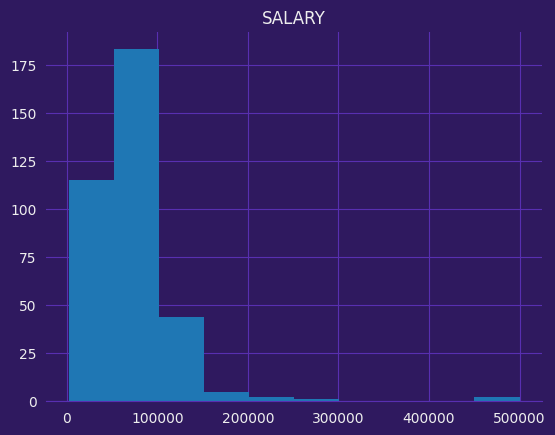

In [41]:
df.hist(column="SALARY")

Так как распределение велечины ненормально, то будем заполнять пропуски медианой

In [42]:
(df['SALARY'].isna().sum()) / len(df) * 100

34.81481481481482

In [43]:
avg_salary = df["SALARY"].median().round()

In [44]:
avg_salary

60000.0

In [45]:
df["SALARY"] = df["SALARY"].fillna(avg_salary)

In [46]:
(df['SALARY'].isna().sum()) / len(df) * 100

0.0

In [47]:
df.head()

,ID,VACANCY_TITLE,COMPANY_NAME,SALARY,CITY,DATE,PROGRAMMING_LANGUAGE,VACANCY_URL
0,94450348,Junior Frontend разработчик,EasyDev,60000.0,Москва,2024-03-09,Python,https://hh.ru/vacancy/94450348
1,94354526,Стажер-разработчик Python,Додо Пицца,150000.0,Ростов-на-Дону,2024-03-06,Python,https://hh.ru/vacancy/94354526
2,94120837,Python junior разработчик,Скиллтеллект,50000.0,Санкт-Петербург,2024-03-01,Python,https://hh.ru/vacancy/94120837
3,94228875,Junior Frontend разработчик,MacBuildServer,50000.0,Самара,2024-03-07,Python,https://hh.ru/vacancy/94228875
4,94293788,Junior Python-разработчик,СОГАЗ,60000.0,Москва,2024-03-06,Python,https://hh.ru/vacancy/94293788


### Проверка дубликатов

In [48]:
df.duplicated().sum()

0

Дубликатов в записях нет

In [74]:
df.to_excel("main.xlsx")

# Определяем самый востребованный у работодателей язык программирования среди junior-специалистов

In [49]:
prog_langs = df["PROGRAMMING_LANGUAGE"].unique()

In [50]:
df_prog_langs = pd.DataFrame(
    {
        "Python": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "Python"]),
        "GO": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "GO"]),
        "Java": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "Java"]),
        "C++": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "C++"]),
        "JS": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "JS"]),
        "C#": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "C#"]),
        "R": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "R"]),
        "Rust": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "Rust"]),
        "PHP": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "PHP"]),
        "1C": len(df.loc[df["PROGRAMMING_LANGUAGE"] == "1C"]),
    },
    index=['amount']
)

In [73]:
df_prog_langs.to_excel("prog_langs.xlsx")

In [51]:
df_prog_langs

,Python,GO,Java,C++,JS,C#,R,Rust,PHP,1C
amount,100,27,55,46,81,52,21,4,54,100


In [52]:
def create_bar_chart(row, color):    
    return sns.barplot(
        y=row.index.str.capitalize().values,
        x=row.values,
        orient="h",
        saturation=1,
        color=color,
        width=0.75,
    )

In [53]:
def set_seaborn_style(background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "grid.color": grid_color,
        "axes.edgecolor": grid_color,
        "axes.grid": True,
        "axes.axisbelow": True,
        
        "axes.labelcolor": text_color,
        "text.color": text_color,
        "xtick.color": text_color,
        "ytick.color": text_color,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)

In [54]:
background_color = "#2F195F"
grid_color = "#582FB1"
bar_color = "#835ED4"
text_color = "#eee"

set_seaborn_style(background_color, grid_color, text_color)

In [55]:
def format_axes(ax):
    ax.tick_params("x", labelsize=20, pad=16)
    ax.tick_params("y", labelsize=20, pad=8)
    
    plt.xticks(
        ticks=ax.get_xticks()[:-1],
        labels=["{}".format(x) for x in ax.get_xticks()[:-1]]
    )

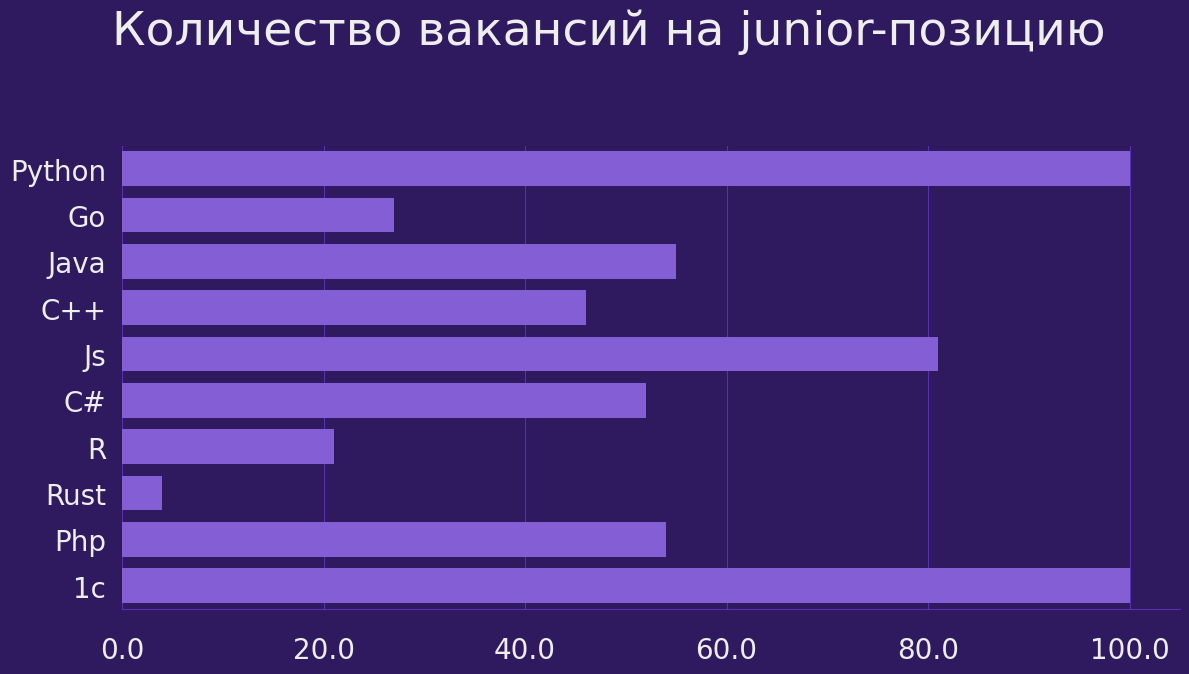

In [56]:
row = df_prog_langs.iloc[-1]

fig = plt.figure(figsize=(12, 7))
ax = create_bar_chart(row, color=bar_color)

# New function
format_axes(ax)

plt.title("Количество вакансий на junior-позицию", fontsize=34, y=1.2, x=0.46)
plt.tight_layout()
plt.show()

На графике видо, что больше всего junior-специалистов требуется по языку 1C и python.

Проверим средние зарплаты по каждому из языков

In [57]:
df_prog_langs_salary = pd.DataFrame(
    {
        "Python": df.loc[df["PROGRAMMING_LANGUAGE"] == "Python"]["SALARY"].mean(),
        "GO": df.loc[df["PROGRAMMING_LANGUAGE"] == "GO"]["SALARY"].mean(),
        "Java": df.loc[df["PROGRAMMING_LANGUAGE"] == "Java"]["SALARY"].mean(),
        "C++": df.loc[df["PROGRAMMING_LANGUAGE"] == "C++"]["SALARY"].mean(),
        "JS": df.loc[df["PROGRAMMING_LANGUAGE"] == "JS"]["SALARY"].mean(),
        "C#": df.loc[df["PROGRAMMING_LANGUAGE"] == "C#"]["SALARY"].mean(),
        "R": df.loc[df["PROGRAMMING_LANGUAGE"] == "R"]["SALARY"].mean(),
        "Rust": df.loc[df["PROGRAMMING_LANGUAGE"] == "Rust"]["SALARY"].mean(),
        "PHP": df.loc[df["PROGRAMMING_LANGUAGE"] == "PHP"]["SALARY"].mean(),
        "1C": df.loc[df["PROGRAMMING_LANGUAGE"] == "1C"]["SALARY"].mean(),
    },
    index=['mean_salary']
)

In [58]:
df_prog_langs_salary

,Python,GO,Java,C++,JS,C#,R,Rust,PHP,1C
mean_salary,64599.15,65783.333333,69309.090909,76803.586957,68391.975309,73057.019231,59619.047619,70000.0,59962.962963,71248.7


In [75]:
df_prog_langs_salary.to_excel("salary.xlsx")

In [59]:
def format_axes(ax):
    ax.tick_params("x", labelsize=20, pad=16)
    ax.tick_params("y", labelsize=20, pad=8)
    
    plt.xticks(
        ticks=ax.get_xticks()[:-1],
        labels=["{}K".format(int(x / 1000)) for x in ax.get_xticks()[:-1]]
    )

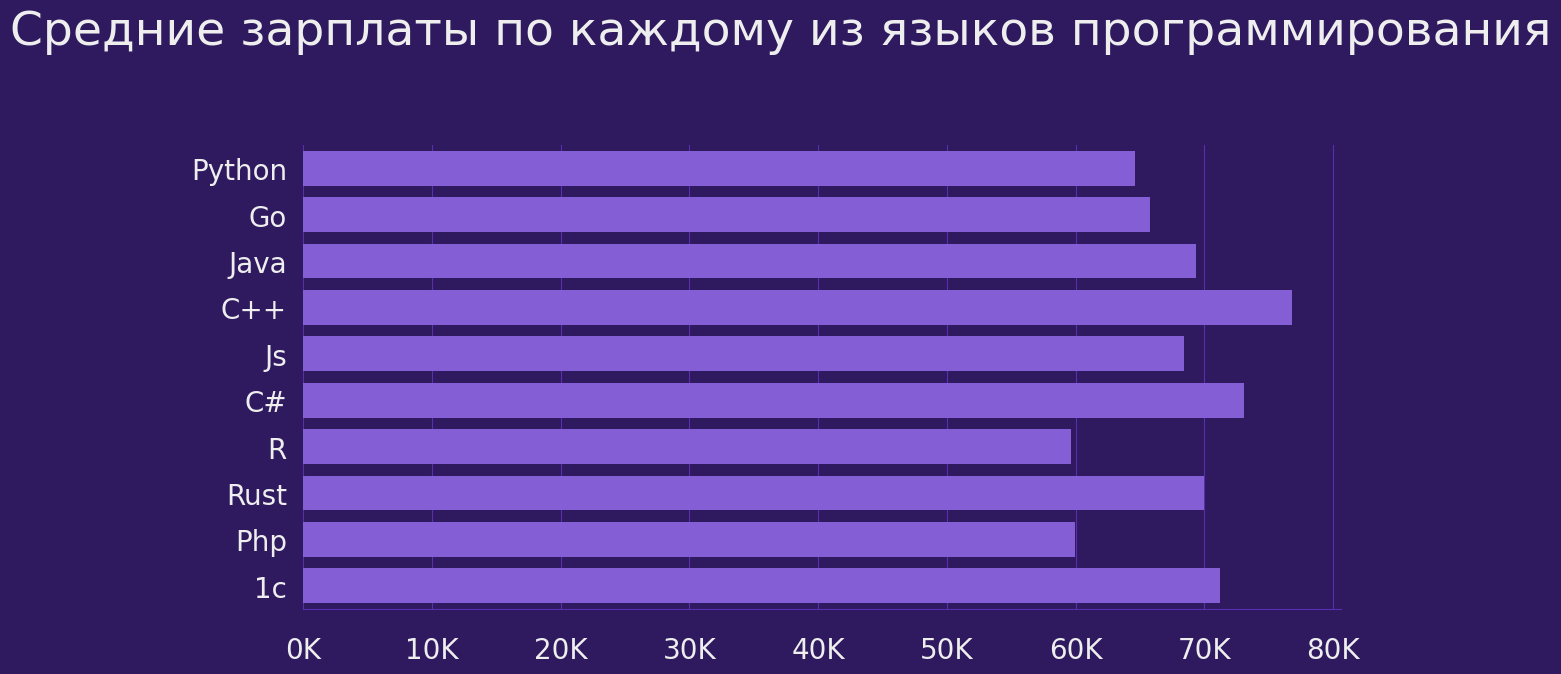

In [60]:
row = df_prog_langs_salary.iloc[-1]

fig = plt.figure(figsize=(12, 7))
ax = create_bar_chart(row, color=bar_color)

# New function
format_axes(ax)

plt.title("Средние зарплаты по каждому из языков программирования", fontsize=34, y=1.2, x=0.46)
plt.tight_layout()
plt.show()

In [61]:
f"Средняя зарплата по рынку: {df['SALARY'].mean().round()} руб."

'Средняя зарплата по рынку: 68175.0 руб.'

In [62]:
df["SALARY"].std()

39205.7237666611

Самые высокие зарплаты в месяц мы видим у C++. 1C же находится на 3 месте

### Кол-во вакансий по городам

In [63]:
city_vacancy = {}

In [64]:
for city in df["CITY"]:
    city_vacancy[city] = len(df.loc[df["CITY"] == city])

In [65]:
df_city_vacancy = pd.DataFrame(city_vacancy, index=["amount_of_vacancy"])

In [66]:
df_city_vacancy

,Москва,Ростов-на-Дону,Санкт-Петербург,Самара,Екатеринбург,Воронеж,Казань,Саратов,Краснодар,Красноярск,...,Красный Яр (Самарская область),Тольятти,Железнодорожный,Владимир,Калуга,Энгельс,Томск,Вольск,Волжский (Волгоградская область),Серов
amount_of_vacancy,205,5,87,9,25,10,16,5,7,8,...,1,1,1,1,1,1,1,1,1,1


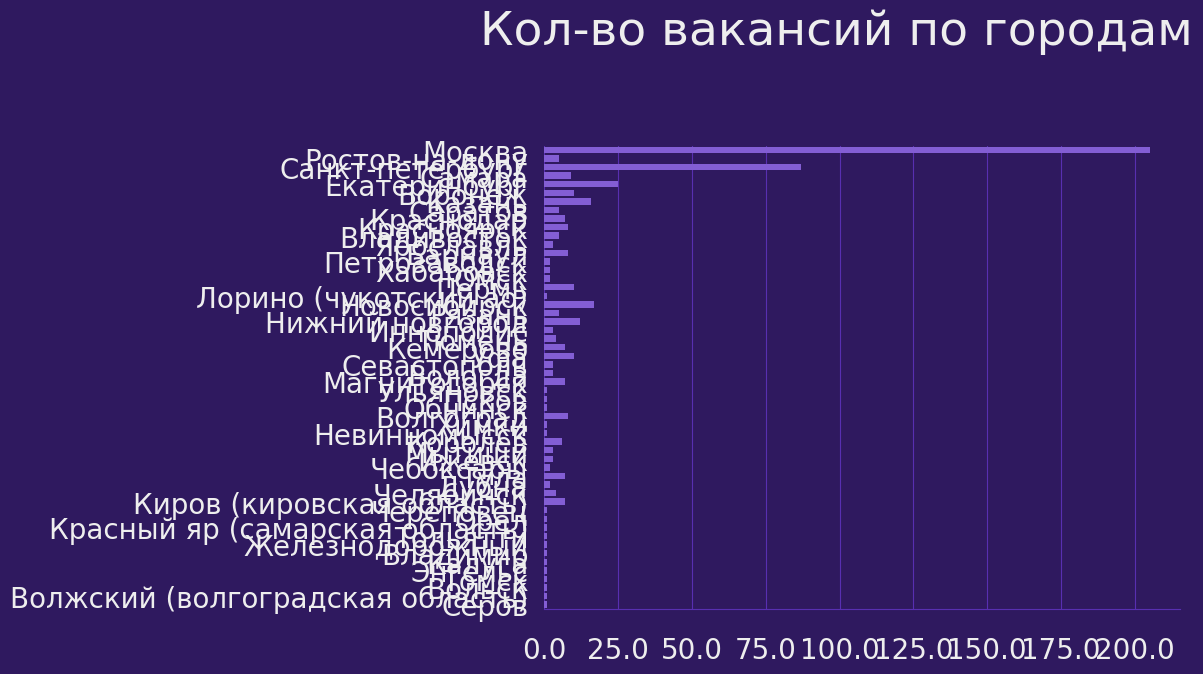

In [68]:
x = df["CITY"].unique().sort()
y = df[]
y=[7, 6, 2, 5, 4, 3]
z=["conference", "journal", "conference", "journal", "conference", "journal"]

# create pandas dataframe
data_list = pd.DataFrame(
    {'x_axis': x,
     'y_axis': y,
     'category': z
    })

# change size of data points
minsize = min(data_list['y_axis'])
maxsize = max(data_list['y_axis'])

# scatter plot
sns.catplot(x="x_axis", y="y_axis", kind="swarm", hue="category",sizes=(minsize*100, maxsize*100), data=data_list)
plt.grid()

Больше всего вакансий в Москве СПб

In [69]:
df_python = df.loc[df["PROGRAMMING_LANGUAGE"] == "Python"]

In [70]:
df_python

,ID,VACANCY_TITLE,COMPANY_NAME,SALARY,CITY,DATE,PROGRAMMING_LANGUAGE,VACANCY_URL
0,94450348,Junior Frontend разработчик,EasyDev,60000.0,Москва,2024-03-09,Python,https://hh.ru/vacancy/94450348
1,94354526,Стажер-разработчик Python,Додо Пицца,150000.0,Ростов-на-Дону,2024-03-06,Python,https://hh.ru/vacancy/94354526
2,94120837,Python junior разработчик,Скиллтеллект,50000.0,Санкт-Петербург,2024-03-01,Python,https://hh.ru/vacancy/94120837
3,94228875,Junior Frontend разработчик,MacBuildServer,50000.0,Самара,2024-03-07,Python,https://hh.ru/vacancy/94228875
4,94293788,Junior Python-разработчик,СОГАЗ,60000.0,Москва,2024-03-06,Python,https://hh.ru/vacancy/94293788
...,...,...,...,...,...,...,...,...
95,86880519,Инженер информационной безопасности Web прилож...,SoftGamings,110000.0,Воронеж,2024-02-15,Python,https://hh.ru/vacancy/86880519
96,93870058,Junior DevOps,Центральный банк Российской Федерации,60000.0,Нижний Новгород,2024-02-27,Python,https://hh.ru/vacancy/93870058
97,94048549,Junior Разработчик на SAS RTDM (стажер),Ак Барс Банк,40000.0,Иннополис,2024-02-29,Python,https://hh.ru/vacancy/94048549
98,93204701,Junior C++ разработчик алгоритмов геометрическ...,Ледас,70000.0,Новосибирск,2024-03-09,Python,https://hh.ru/vacancy/93204701
